In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

import os
from typing import List
from pathlib import Path

np.random.seed(444)

# Reading Pyo Output File
The raw output from Pyomo is stored in a text file, so we transform it into a dataframe

In [8]:
#
# This block reads text from the file into lists, converting lines seperated with
# a '|' into entries of lists
#
# eg: 'TotalAcerage    | 24324.0' => ['TotalAcerage', 24324.0]
#

raw_file = Path('../../MiniModelRunning/run2/rawPyoOut_MiniModel2_1Development.txt')

# All 4 lists look like [['167N_2021_PLSQ', 221277.0], ... ]
vars_list = []
shadowprice_list = []
slackge_list = []
slackle_list = []

list_map = {
    '== Variables': vars_list,
    '== Shadow Prices': shadowprice_list,
    '== Slacks for GE': slackge_list,
    '== Slacks for LE': slackle_list
}

with open(raw_file, 'r') as f:
    EOF = ''
    
    read_data = False
    active_list = None
    
    line = 'not EOF'
    while line != EOF:
        line = f.readline()
        stripped = line.strip()

        # Check if we have a new section
        if stripped in list_map.keys():
            read_data = True
            active_list = list_map[stripped]
            
        # Check if we're at the end of a section
        elif stripped == '':
            read_data = False
        
        # Write data if we're within a data section
        elif read_data:
            splitline = line.split("|")
            splitline[0] = splitline[0].strip()
            splitline[1] = float(splitline[1])
            active_list.append(splitline)

#shadowprice_list
# list_map.keys()
vars_list

[['167N_2021_PLSQ', 221277.0],
 ['167N_2021_THNB', 0.0],
 ['167N_2025_PLSQ', 219245.0],
 ['167N_2025_THNB', 0.0],
 ['167N_2030_PLSQ', 216705.0],
 ['167N_2030_THNB', 0.0],
 ['167N_2050_PLSQ', 206545.0],
 ['167N_2050_THNB', 0.0],
 ['167S_2021_PLSQ', 197602.0],
 ['167S_2021_THNB', 0.0],
 ['167S_2025_PLSQ', 195786.0],
 ['167S_2025_THNB', 0.0],
 ['167S_2030_PLSQ', 193516.0],
 ['167S_2030_THNB', 0.0],
 ['167S_2050_PLSQ', 184436.0],
 ['167S_2050_THNB', 0.0],
 ['505_2021_ASV', 54907.0],
 ['505_2021_IFM', 0.0],
 ['505_2021_PLSQ', 0.0],
 ['505_2021_THNB', 0.0],
 ['505_2025_ASV', 54403.0],
 ['505_2025_IFM', 0.0],
 ['505_2025_PLSQ', 0.0],
 ['505_2025_THNB', 0.0],
 ['505_2030_ASV', 0.0],
 ['505_2030_IFM', 0.0],
 ['505_2030_PLSQ', 53773.0],
 ['505_2030_THNB', 0.0],
 ['505_2050_ASV', 51253.0],
 ['505_2050_IFM', 0.0],
 ['505_2050_PLSQ', 0.0],
 ['505_2050_THNB', 0.0],
 ['608_2021_AWR', 0.0],
 ['608_2021_PLSQ', 118164.0],
 ['608_2025_AWR', 0.0],
 ['608_2025_PLSQ', 118164.0],
 ['608_2030_AWR', 0.0],
 ['6

In [104]:
#
# Now we convert the lists into dataframes
#


# Convert the variable list into a dataframe
dfvars = pd.DataFrame(vars_list)
dfvars.columns = ['varname', 'acres']

print(dfvars)

# This line removes all variables without 3 components seperated by '_'
# this is meant for the dummy variables
badnames = dfvars[dfvars['varname'].map(
    lambda x: len(x.split('_')) != 3
)]
dfvars = dfvars.drop(badnames.index)

# The varname column is now split in 3 based on the '_'
# See: https://stackoverflow.com/questions/37333299/splitting-a-pandas-dataframe-column-by-delimiter
dfvars[['for_type', 'year', 'mng']] = dfvars['varname'].str.split('_', expand=True)
dfvars = dfvars.drop(columns='varname')

# Set the variables as indexes
dfvars = dfvars.set_index(['for_type', 'year', 'mng'])


# TODO: Convert other lists into dataframes
dfshadowprice = None

dfslackge = None

dfslackle = None



dfvars.reset_index()

           varname     acres
0   167N_2021_PLSQ  221277.0
1   167N_2021_THNB       0.0
2   167N_2025_PLSQ  219245.0
3   167N_2025_THNB       0.0
4   167N_2030_PLSQ  216705.0
5   167N_2030_THNB       0.0
6   167N_2050_PLSQ  206545.0
7   167N_2050_THNB       0.0
8   167S_2021_PLSQ  197602.0
9   167S_2021_THNB       0.0
10  167S_2025_PLSQ  195786.0
11  167S_2025_THNB       0.0
12  167S_2030_PLSQ  193516.0
13  167S_2030_THNB       0.0
14  167S_2050_PLSQ  184436.0
15  167S_2050_THNB       0.0
16    505_2021_ASV   54907.0
17    505_2021_IFM       0.0
18   505_2021_PLSQ       0.0
19   505_2021_THNB       0.0
20    505_2025_ASV   54403.0
21    505_2025_IFM       0.0
22   505_2025_PLSQ       0.0
23   505_2025_THNB       0.0
24    505_2030_ASV       0.0
25    505_2030_IFM       0.0
26   505_2030_PLSQ   53773.0
27   505_2030_THNB       0.0
28    505_2050_ASV   51253.0
29    505_2050_IFM       0.0
30   505_2050_PLSQ       0.0
31   505_2050_THNB       0.0
32    608_2021_AWR       0.0
33   608_2021_

,for_type,year,mng,acres
0,167N,2021,PLSQ,221277.0
1,167N,2021,THNB,0.0
2,167N,2025,PLSQ,219245.0
3,167N,2025,THNB,0.0
4,167N,2030,PLSQ,216705.0
5,167N,2030,THNB,0.0
6,167N,2050,PLSQ,206545.0
7,167N,2050,THNB,0.0
8,167S,2021,PLSQ,197602.0
9,167S,2021,THNB,0.0


In [103]:
df_fortype_year = dfvars \
    .reset_index() \
    .groupby(['for_type', 'year']) \
    .sum()

# df_fortype_year = df_fortype_year \
#     .reset_index() \
#     .set_index(['year', 'for_type'])

df_167N = df_fortype_year.loc['167N']


series_167N = list(df_167N['acres'])
series_167N

[221277.0, 219245.0, 216705.0, 206545.0]

# Making Visuals
Now with a dataframe, lets make some visuals

In [28]:
year_list = dfvars.index \
                    .droplevel(['mng', 'for_type']) \
                     .unique()  \
                     .astype(int) \
                     .to_list()
year_list.sort()
year_list_str = [str(x) for x in year_list]
year_list


[2021, 2025, 2030, 2050]

In [29]:
fortype_list = dfvars.index \
                    .droplevel(['mng', 'year']) \
                    .unique() \
                    .astype(str) \
                    .to_list()
fortype_list.sort()
fortype_list

['167N', '167S', '505', '608', '999']

In [31]:
mng_list = dfvars.index \
                .droplevel(['for_type', 'year']) \
                .unique() \
                .astype(str) \
                .to_list()
mng_list.sort()
mng_list

['ASV', 'AWR', 'CAR', 'IFM', 'NAR', 'PLSQ', 'THNB']

### Figure 1 - Management by Forest Type over Time

X Axis: ['2021', '2025', '2030', '2050']
Y-Axis AWR: [0.0, 0.0, 5000.0, 20000.0]
Y-Axis CAR: [2931.0, 2931.0, 2931.0, 2931.0]
Y-Axis NAR: [0.0, 0.0, 0.0, 0.0]
Y-Axis PLSQ: [21914.0, 21650.0, 16320.0, 0.0]


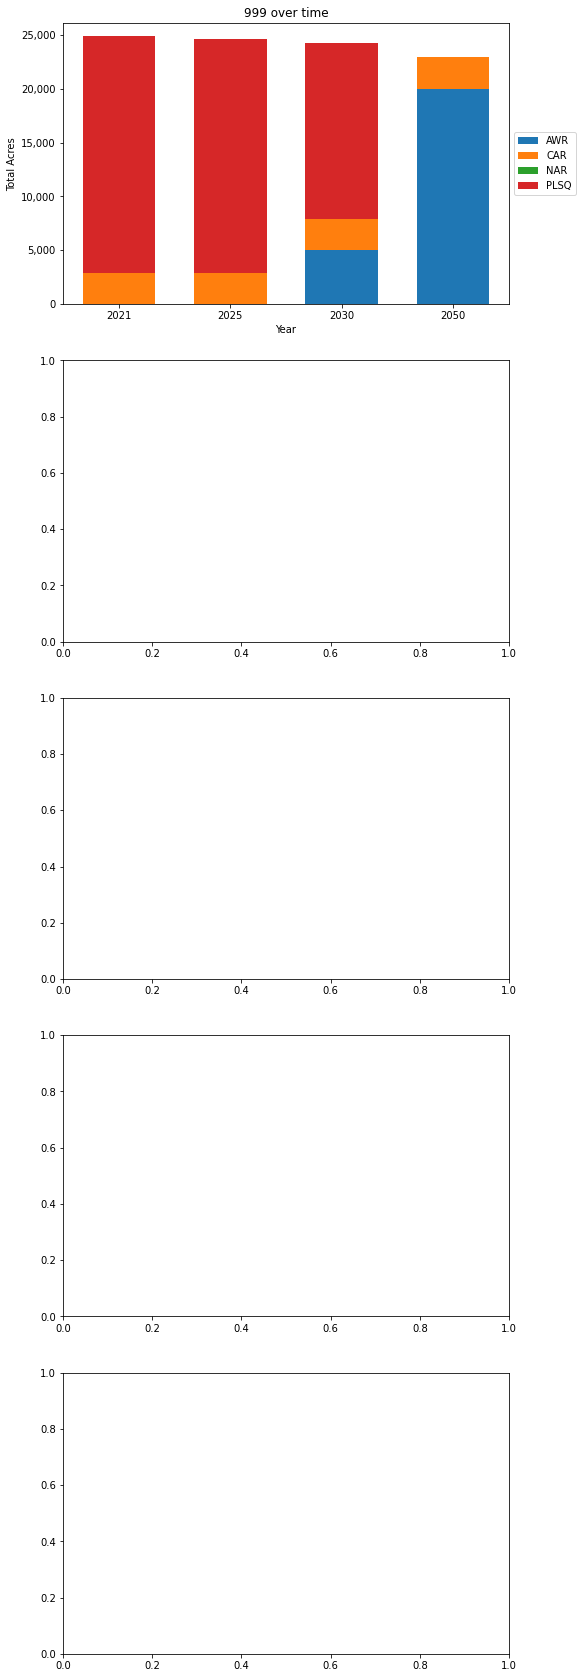

In [40]:
WIDTH = 0.65
fig, ax = plt.subplots(ncols=1, nrows=len(fortype_list), figsize=(8, 30))

for ind, ft in enumerate(fortype_list[4:]):
    df_ft = dfvars.loc[ft]
    
    #
    # Step 1: Pull out data
    
    # I gave up trying to find a more pythonic / pandas friendly way to do
    # all this. What I did here is definitely not ideal
    loc_mnglist = df_ft.index.droplevel(['year']).unique().to_list()
    list_dict  ={}
    for mng in loc_mnglist:
        list_dict[mng] = []
    
    for year in year_list:
        dfyr = df_ft.loc[str(year)]
        for mng in loc_mnglist:
            list_dict[mng].append(float(dfyr.loc[mng]['acres']))
    
    #
    # Step 2: Draw Graph
    ft_ax = ax[ind]
    
    print(f"X Axis: {year_list_str}")
    
    bottoms = [0] * len(list_dict[loc_mnglist[0]])
    for mng in loc_mnglist:
        series = list_dict[mng]
        print(f"Y-Axis {mng}: {series}")
        ft_ax.bar(year_list_str, series, WIDTH, label=mng, bottom=bottoms)
        bottoms = [bottoms[i] + x for i, x in enumerate(series)]
    
    ft_ax.set_title(f'{ft} over time')
    ft_ax.legend(bbox_to_anchor=(1, 0.5), loc='center left')
    ft_ax.set_ylabel('Total Acres')
    ft_ax.set_xlabel('Year')
    
    # This adds commas to big numbers, '10000' => '10,000'
    # See: https://stackoverflow.com/questions/25973581/how-do-i-format-axis-number-format-to-thousands-with-a-comma-in-matplotlib
    ft_ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

### Figure 2 - Acres of Forest Types Over Time

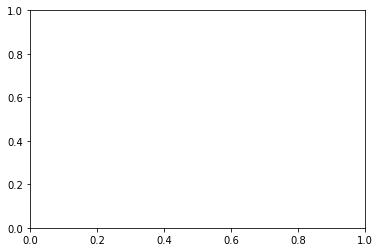

In [8]:
fig, ax = plt.subplots()

# Yea... I give up trying to use Pandas for now
varsdict = dfvars.to_dict()

